# Assignment 1b - Due 10pm March 14th 2022
### By Sam Archie (53743534/sar173)

In [1]:
# Import all modules needed for this assignment
import xarray as xr
import numpy as np
import salem
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### Task 1: Calculate the Average Wind Speed
Create a fuction called ```ws_monthavg_10m``` that calculates the average wind velocity ($\sqrt{U^2 + V^2}$) at a 10 metres height for the month of January 2020.

In [2]:
def ws_monthavg_10m(date_string="20200101000000", height=10):
    """
    Calculate and return the average wind velocities for a given month across each location at a given height from the ground. To be flexible, this function only requires two optional parameters which are: the year-month-day-time string and the height (from the ground). The defaults are set for January 2020 at 10m height, so, if you wish to analyse a different month or height, then it can be passed in.
    """
    # Open the W-E windspeed ("U") and only select entries at the given height
    u_windspeeds = xr.open_dataset(f"/mnt/data/MetService_WRF/U_{date_string}.nc").U.sel(height=height)
    # Open the S-N windspeed ("V") and only select entries at the given height
    v_windspeeds = xr.open_dataset(f"/mnt/data/MetService_WRF/V_{date_string}.nc").V.sel(height=height)
    # Calculate the velocity by the sum of the squares of U and V
    wind_velocities = np.sqrt(u_windspeeds ** 2 + v_windspeeds ** 2)
    # Return the average wind velocity at each lat/lon for all of the month
    return wind_velocities.mean(dim=["time"])


In [3]:
# Calculate the average wind velocities for the next task
average_wind_velocities = ws_monthavg_10m()

### Task 2: Visualise the Average Wind Speed
Create a fuction called ```ws_monthavg_10m_map``` that plots the average wind velocity at a 10 metres height for the month of January 2020.

In [4]:
def ws_monthavg10m_map(average_wind_velocities=ws_monthavg_10m(), **kwargs):
    """
    Produce a filled contour map of average_wind_velocities. If the average_wind_velocities are not given, then they are calculated by running 'ws_monthavg_10m' using default arguments. Any other keyword arguments provided are passed directly to matplotlib.pyplot to control the plotting style.
    """
    # Just in case this function runs multiple times and creates multiple figures, close all figures to reduce memory space.
    plt.close("all")
    # Create an axis to plot on that resembles New Zealand
    ax = plt.axes(projection=ccrs.Orthographic(170, -45))
    # Plot the average wind velocities on the axis. Transformation is done by salem, and any other user parameters for matplotlib are also inputted
    average_wind_velocities.plot(ax=ax, transform=average_wind_velocities.salem.cartopy(), **kwargs)
    # Add the coastlines to the plot
    ax.coastlines()
    # Get the current figure
    fig = plt.gcf()
    # So we can set the dpi
    fig.set_dpi(300)

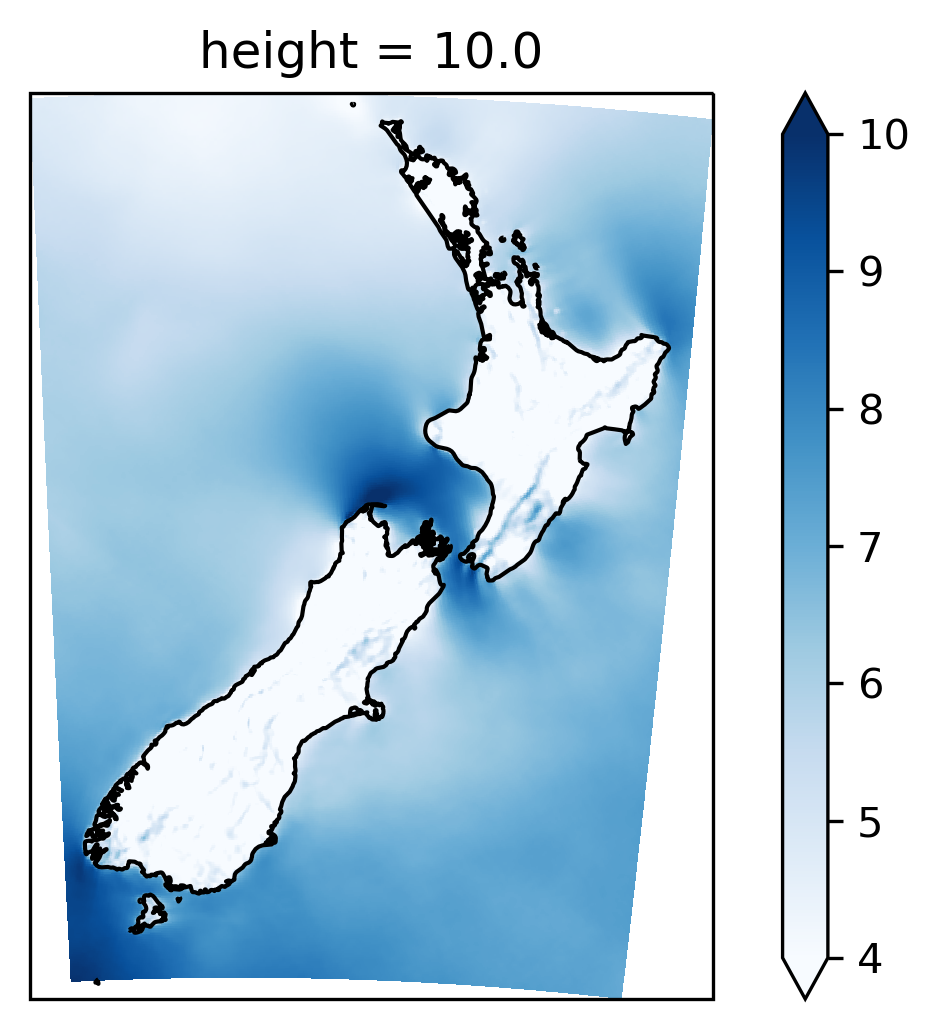

In [6]:
# Generate a map of the average wind velocities across New Zealand. The line below makes a basic/default map, and I have included examples of other ways to generate plots (which are commented out). Any matplotlib.pyplot keyword tat is acceptable for matplotlib QuadMesh's can be passed in.
ws_monthavg10m_map(average_wind_velocities)
# ws_monthavg10m_map(average_wind_velocities, cmap="jet")
# ws_monthavg10m_map(average_wind_velocities, cmap="Paired", vmin=4)
# ws_monthavg10m_map(average_wind_velocities, cmap="Reds", vmax=10)
# ws_monthavg10m_map(average_wind_velocities, cmap="Blues", vmin=4, vmax=10)
